In [8]:
### atomization energy for HEAT and W4-MR
import numpy as np

atoms = '''
# atom     FCI      AFQMC/CCSD_PT    ERROR     AFQMC/CCSD_PT2   ERROR       AFQMC/CISD    ERROR      AFQMC/HF    ERROR       CCSD(T)
    H                                     -0.499278403419583
    B   -24.58976	 -24.589893     0.000006     -24.589893    0.000006     -24.58955    0.00002     -24.5844	0.0002	    -24.58939
    C   -37.76066    -37.760544     0.000004     -37.760543    0.000004     -37.76036    0.00002     -37.7560	0.0002	    -37.76032
    N   -54.47855    -54.478358     0.000002     -54.478366    0.000002     -54.47836    0.00001     -54.4778	0.0001	    -54.47838
    O   -74.91006    -74.909949     0.000004     -74.909932    0.000004     -74.90990	 0.00002     -74.9075	0.0002	    -74.90987
    F   -99.52774    -99.527678     0.000009     -99.527673    0.000010     -99.52766	 0.00003     -99.5261	0.0002	    -99.52754
#    Cl      -        -459.59909     0.000008     -459.59906    0.000010     -459.598984  0.000009
#    S       -        -397.60083     0.000005     -397.60083    0.000005     -397.600627  0.000009
'''

my_heat_data = '''
#   Mol          CCSD(T)              AFQMC/CCSD_PT                  AFQMC/CCSD_PT2
    C2H       -76.39855638        -76.399014 +/- 0.000051       -76.399562 +/- 0.000058
    C2H2      -77.10924902        -77.109546 +/- 0.000064       -77.109680 +/- 0.000115
    CF        -137.4748482        -137.475760 +/- 0.000192      -137.475671 +/- 0.000156
    CH        -38.37935551        -38.380189 +/- 0.000024       -38.379985 +/- 0.000011
    CH2       -39.04119570        -39.041474 +/- 0.000006       -39.041480 +/- 0.000007
    CH3       -39.71553966        -39.715980 +/- 0.000010       -39.715982 +/- 0.000011
    CN        -92.48869527        -92.487483 +/- 0.000157       -92.490868 +/- 0.000417 (-92.490273 +/- 0.000163)
    CO        -113.0544306        -113.055092 +/- 0.000092      -113.054777 +/- 0.000109
    CO2       -188.1474293        -188.148924 +/- 0.000137      -188.148620 +/- 0.000120
    F2        -199.0963839        -199.098269 +/- 0.000057      -199.098891 +/- 0.000077
    H2        -1.163426264        -1.163426 +/- 0.000001         -1.163423 +/- 0.000001
    H2O       -76.24101779        -76.241701 +/- 0.000038       -76.241738 +/- 0.000062
    H2O2      -151.1936301        -151.194724 +/- 0.000058      -151.194733 +/- 0.000060
    HCN       -93.18832063        -93.189107 +/- 0.000157       -93.188920 +/- 0.000157
    HCO       -113.5757054        -113.576087 +/- 0.000097      -113.575954 +/- 0.000145
    HF        -100.2281312        -100.228669 +/- 0.000031      -100.228645 +/- 0.000032
    HNO       -130.1696778        -130.172789 +/- 0.000079      -130.172245 +/- 0.000218 (-130.172028 +/- 0.000074)
    HO2       -150.5584809        -150.559452 +/- 0.000056      -150.559348 +/- 0.000056
    N2        -109.2752986        -109.276029 +/- 0.000140      -109.275833 +/- 0.000121
    NH        -55.09129056        -55.091499 +/- 0.000007       -55.091517 +/- 0.000018
    NH2       -55.73250631        -55.732956 +/- 0.000013       -55.732938 +/- 0.000013
    NH3       -56.40191327        -56.402489 +/- 0.000029       -56.402502 +/- 0.000031
    NO        -129.5977782        -129.598245 +/- 0.000077      -129.597858 +/- 0.000095
    O2        -149.9856842        -149.985698 +/- 0.000084      -149.985554 +/- 0.000068
    OF        -174.4979237        -174.498355 +/- 0.000059      -174.498380 +/- 0.000174 (-174.498199 +/- 0.000062)
    OH        -75.55923331        -75.559572 +/- 0.000015       -75.559586 +/- 0.000016
'''

In [53]:
heat_mols = ["H2","CH","CH2","NH","CH3","NH2","OH","HF",
        "H2O","NH3","C2H","CN","C2H2","CO","HCN","N2",
        "HCO","CF","NO","HNO","O2","HO2","OF","H2O2","F2","CO2"]
data_dic = {}
with open("/home/yichi/research/afqmc_cisd_data/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        species = parts[0]
        data_dic[species] = {}
        data_dic[species]["ccsdt"] = float(parts[1])
        data_dic[species]["ccsdt[q]"] = float(parts[2])
        data_dic[species]["ccsdt(q)"] = float(parts[3])
        data_dic[species]["ccsdtq"] = float(parts[4])
        data_dic[species]["ccsdtqp"] = float(parts[5])

ref = np.array([data_dic[mol]["ccsdtqp"] for mol in heat_mols])
data = np.loadtxt("/home/yichi/research/afqmc_cisd_data/heat/ene.txt", delimiter=",")
afqmc_cisd = (data[:, 5])
afqmc_cisd_stoc_err = data[:, 6] *1000

for i,mol in enumerate(heat_mols):
    data_dic[mol]["afqmc_cisd"] = afqmc_cisd[i]
    data_dic[mol]["afqmc_cisd_err(mH)"] = afqmc_cisd_stoc_err[i]

In [54]:
for line in my_heat_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            ccsd_t = line.split()[1]
            afqmc_ccsd_pt = line.split()[2]
            afqmc_ccsd_pt_err = line.split()[4]
            afqmc_ccsd_pt2 = line.split()[5]
            afqmc_ccsd_pt2_err = line.split()[7]
            data_dic[mol]["ccsd_t"] = float(ccsd_t)
            data_dic[mol]["afqmc_ccsd_pt"] = float(afqmc_ccsd_pt)
            data_dic[mol]["afqmc_ccsd_pt_err(mH)"] = float(afqmc_ccsd_pt_err)*1000
            data_dic[mol]["afqmc_ccsd_pt2"] = float(afqmc_ccsd_pt2)
            data_dic[mol]["afqmc_ccsd_pt2_err(mH)"] = float(afqmc_ccsd_pt2_err)*1000

In [39]:
atom_energy = {}
for line in atoms.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            atom = parts[0]
            atom_energy[atom] = {}
            if "H" not in atom:
                atom_energy[atom]["fci"] = float(parts[1])
                atom_energy[atom]["afqmc_ccsd_pt"] = float(parts[2])
                atom_energy[atom]["afqmc_ccsd_pt_err"] = float(parts[3])*1000
                atom_energy[atom]["afqmc_ccsd_pt2"] = float(parts[4])
                atom_energy[atom]["afqmc_ccsd_pt2_err"] = float(parts[5])*1000
                atom_energy[atom]["afqmc_cisd"] = float(parts[6])
                atom_energy[atom]["afqmc_cisd_err"] = float(parts[7])*1000
                atom_energy[atom]["ccsd_t"] = float(parts[10])
atom_energy["H"] = -0.499278403419583

In [14]:
import re

def parse_formula(formula):
    pattern = r"([A-Z][a-z]?)(\d*)"
    counts = {}
    for (element, count) in re.findall(pattern, formula):
        count = int(count) if count else 1
        counts[element] = counts.get(element, 0) + count
    return counts

In [19]:
formula = parse_formula("H2O2")
print(formula)

{'H': 2, 'O': 2}


In [43]:
sum_atom_energy = {}
for mol in heat_mols:
    sum_atom_energy[mol] = {}
    formula = parse_formula(mol)
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["fci"] * count
    sum_atom_energy[mol]['ref'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_cisd"] * count
    sum_atom_energy[mol]['afqmc_cisd'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_ccsd_pt"] * count
    sum_atom_energy[mol]['afqmc_ccsd_pt'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_ccsd_pt2"] * count
    sum_atom_energy[mol]['afqmc_ccsd_pt2'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["ccsd_t"] * count
    sum_atom_energy[mol]['ccsd_t'] = energy

In [44]:
sum_atom_energy

{'H2': {'ref': -0.998556806839166,
  'afqmc_cisd': -0.998556806839166,
  'afqmc_ccsd_pt': -0.998556806839166,
  'afqmc_ccsd_pt2': -0.998556806839166,
  'ccsd_t': -0.998556806839166},
 'CH': {'ref': -38.25993840341958,
  'afqmc_cisd': -38.25963840341958,
  'afqmc_ccsd_pt': -38.259822403419584,
  'afqmc_ccsd_pt2': -38.25982140341958,
  'ccsd_t': -38.25959840341958},
 'CH2': {'ref': -38.75921680683917,
  'afqmc_cisd': -38.75891680683917,
  'afqmc_ccsd_pt': -38.75910080683917,
  'afqmc_ccsd_pt2': -38.75909980683917,
  'ccsd_t': -38.75887680683917},
 'NH': {'ref': -54.97782840341958,
  'afqmc_cisd': -54.97763840341958,
  'afqmc_ccsd_pt': -54.97763640341958,
  'afqmc_ccsd_pt2': -54.97764440341958,
  'ccsd_t': -54.97765840341958},
 'CH3': {'ref': -39.25849521025875,
  'afqmc_cisd': -39.25819521025875,
  'afqmc_ccsd_pt': -39.25837921025875,
  'afqmc_ccsd_pt2': -39.25837821025875,
  'ccsd_t': -39.25815521025875},
 'NH2': {'ref': -55.47710680683917,
  'afqmc_cisd': -55.47691680683917,
  'afqmc_c

In [47]:
sum_atom_energy['CO2']['ref'] - data_dic['CO2']['ccsdtqp']

0.5687199999999848

In [51]:
sum_atom_energy['CO2']['ccsd_t'] - data_dic['CO2']['ccsd_t']

0.5673692999999957

In [55]:
ccsd_t = []
ccsdtqp = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = [] 
afqmc_ccsd_pt2 = []
for mol in heat_mols:
    ccsd_t = np.hstack((ccsd_t,sum_atom_energy[mol]['ccsd_t']-data_dic[mol]['ccsd_t']))
    ccsdtqp = np.hstack((ccsdtqp,sum_atom_energy[mol]['ref']-data_dic[mol]['ccsdtqp']))
    afqmc_cisd = np.hstack((afqmc_cisd,sum_atom_energy[mol]['afqmc_cisd']-data_dic[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,sum_atom_energy[mol]['afqmc_ccsd_pt']-data_dic[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,sum_atom_energy[mol]['afqmc_ccsd_pt2']-data_dic[mol]['afqmc_ccsd_pt2']))

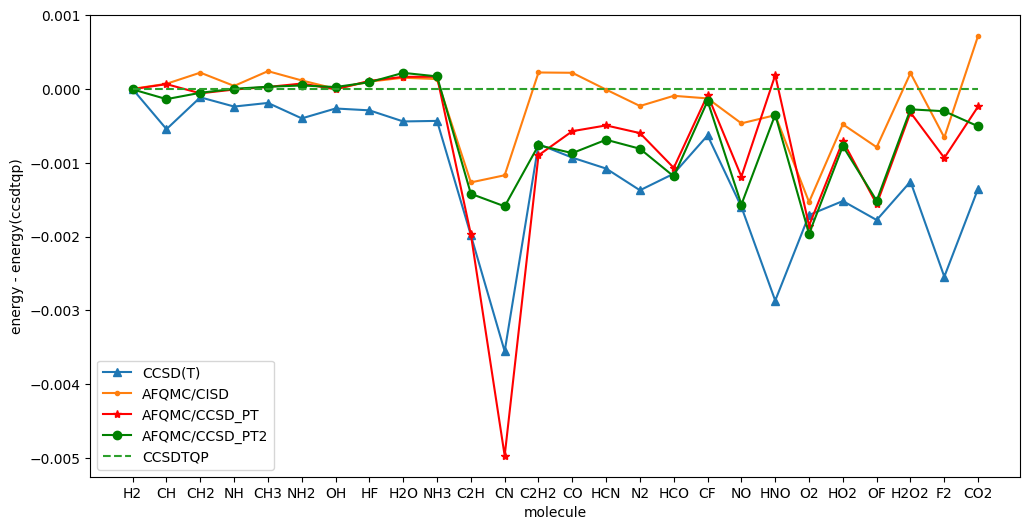

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(heat_mols,ccsd_t-ccsdtqp,'^-',label='CCSD(T)')
# plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(heat_mols,afqmc_cisd-ccsdtqp,'.-',label='AFQMC/CISD')
plt.plot(heat_mols,afqmc_ccsd_pt-ccsdtqp,'*-',color='red',label='AFQMC/CCSD_PT')
plt.plot(heat_mols,afqmc_ccsd_pt2-ccsdtqp,'o-',color='green',label='AFQMC/CCSD_PT2')
plt.plot(heat_mols,[0]*len(heat_mols),'--',label='CCSDTQP')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()

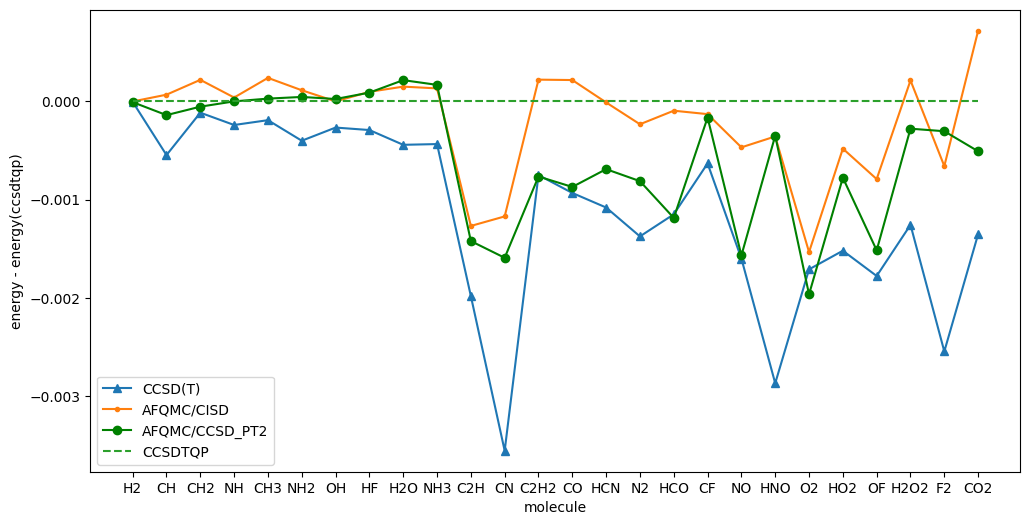

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(heat_mols,ccsd_t-ccsdtqp,'^-',label='CCSD(T)')
# plt.plot(mols,afqmc_hf-ccsdtqp,'x-',label='AFQMC/HF')
plt.plot(heat_mols,afqmc_cisd-ccsdtqp,'.-',label='AFQMC/CISD')
# plt.plot(heat_mols,afqmc_ccsd_pt-ccsdtqp,'*-',color='red',label='AFQMC/CCSD_PT')
plt.plot(heat_mols,afqmc_ccsd_pt2-ccsdtqp,'o-',color='green',label='AFQMC/CCSD_PT2')
plt.plot(heat_mols,[0]*len(heat_mols),'--',label='CCSDTQP')
plt.xlabel('molecule')
plt.ylabel('energy - energy(ccsdtqp)')
plt.legend()
plt.show()